<a href="https://colab.research.google.com/github/Robin-01/California-Coastal-Sea-Currents/blob/main/CA_Coastal_Sea_Currents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Coastal Sea Currents
Under the Data Science for Oceanography (DSO) program at the University of Washington, Seattle, this notebook is part of the project done by Alexander Weintraub, Ashlee Ajala, Dev Banthia, and Robin Adhikari. This project, looks at how the winds affect the coastal sea currents and what aspects are responsible for causing these currents, eg. Zonal winds, Meriodonoal winds, Upwelling of water, Cold Sea Surface Heights (SSH) due to upwelling of water mass and track chlorophyll concentrations as a result, etc. We analyze these factors using the radar data from different timestamps and plot graphs of different variables to visualize these changes.

In this Google Colab notebook, we will be exploring this aspect of Physical Oceanography and applying Machine Learning methodologies to predict the coastal sea currents overtime.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 123.1 MB/s eta 0:00:00


In [3]:
import cartopy
print(cartopy.__version__)

0.25.0


In [4]:
import numpy as np                 #for general calculations.
import matplotlib.pyplot as plt    #making plots.
import xarray as xr                #loading and working with data in an optimal way.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

#this command allows interactive plots in noteboks
%matplotlib inline

In [5]:
#Specify the data file to load
USWC_6_km='/content/drive/MyDrive/UW-DSO 2025/California_Coastal_Sea_Currents/uswc_6km_Resolution_Hourly_RTV_best_2024_2025.nc4'  #loading from google drive

wind_data_1 = xr.open_dataset(USWC_6_km)  #xarray can open different format data, netcdf is one of them
wind_data_1

<xarray.Dataset> Size: 8GB
Dimensions:   (time: 12341, lat: 367, lon: 234)
Coordinates:
    time_run  (time) datetime64[ns] 99kB ...
  * time      (time) datetime64[ns] 99kB 2024-01-01 ... 2025-05-29T04:00:00
  * lat       (lat) float32 1kB 30.25 30.3 30.36 30.41 ... 49.88 49.94 49.99
  * lon       (lon) float32 936B -130.4 -130.3 -130.2 ... -115.9 -115.9 -115.8
Data variables:
    u         (time, lat, lon) float32 4GB ...
    wgs84     int8 1B ...
    v         (time, lat, lon) float32 4GB ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202505141600siohfruwlsrtvuswc6km
    date_created:              2025-05-14T18:24:43Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_version:           2.0.00
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:HFRADAR_US_West_Coast_6km_Resolutio...
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...

In [8]:
USWC_500_m = '/content/drive/MyDrive/UW-DSO 2025/California_Coastal_Sea_Currents/DSO Data/uswc_500m_Resolution_hourly_2012_2025.nc4' #loading from google drive

wind_data_2 = xr.open_dataset(USWC_500_m)
wind_data_2

<xarray.Dataset> Size: 15GB
Dimensions:   (time: 117361, lat: 153, lon: 106)
Coordinates:
    time_run  (time) datetime64[ns] 939kB ...
  * time      (time) datetime64[ns] 939kB 2012-01-01 ... 2025-07-22T19:00:00
  * lat       (lat) float32 612B 37.46 37.46 37.46 37.47 ... 38.13 38.13 38.14
  * lon       (lon) float32 424B -122.6 -122.6 -122.6 ... -122.1 -122.1 -122.0
Data variables:
    u         (time, lat, lon) float32 8GB ...
    wgs84     (time) int8 117kB ...
    v         (time, lat, lon) float32 8GB ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202507091600siohfruwlsrtvuswc500m
    date_created:              2025-07-09T17:17:16Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_version:           2.0.00
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:HFRADAR_US_West_Coast_500m_Resoluti...
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...

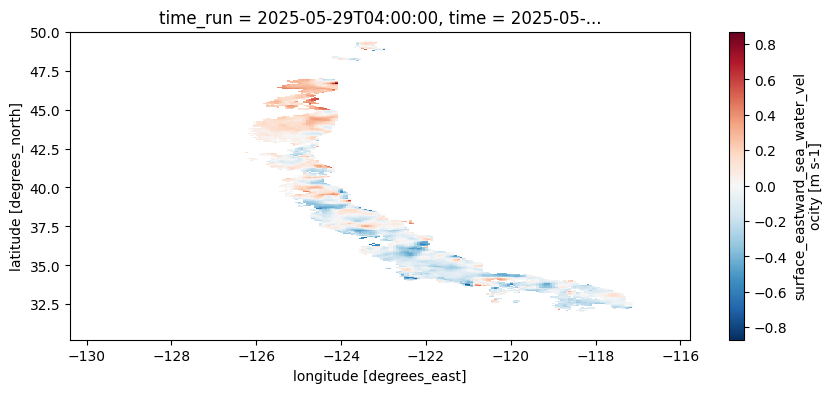

In [8]:
# Wind data 1 - 6km from 2024 to 2025 plot for u (east-west wind, aka 'Zonal winds')
plt.figure(figsize=(10,4))                  #Specify figure size in inches
wind_data_1.isel(time=-1)['u'].plot(cmap='RdBu_r') #Plot using in-built xarray tools; isel() selects based on specified indices
plt.savefig('u.png')

**Meriodonal Wind (North-South) data plot:**
Plotting made using matplotlib functions and xarray datasets. The meriodonal winds are denoted by 'v', which is represented by the plot below.

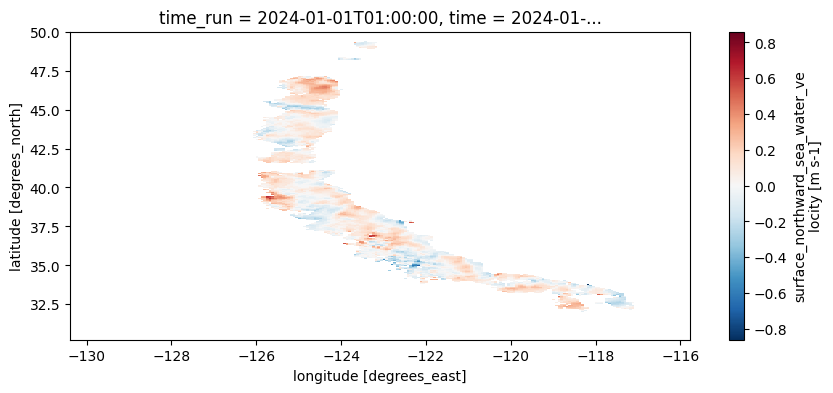

In [7]:
# Wind data 1 - 6km from 2024 to 2025 plot for 'v' (north-south wind, aka 'Meriodonal winds')
plt.figure(figsize=(10,4))
wind_data_1.isel(time=1)['v'].plot(cmap='RdBu_r')
plt.savefig('v.png')

In [10]:
wind_data_1_video=wind_data_1['u'].sel(time=slice("2024-01-30", "2024-06-30"))-273.15 #in Celcius now

def animation_func(i):
    fig.clear()
    ax = plt.axes(projection=ccrs.PlateCarree())                  #specifying the projection such that coasline data could be added
    wind_data_1_video.isel(time=i).plot(cmap='YlGn_r',vmin=0, vmax=30)    #plotting the data
    ax.add_feature(cfeature.COASTLINE)                            #adding the coastline over the plotted data
    ax.add_feature(cfeature.BORDERS)                              #adding the borders

    plt.axis('off')

fig = plt.figure(figsize=(10,4))
animation = FuncAnimation(fig, animation_func,
                          frames = len(wind_data_1.time))

animation.save('wind_data_1_video.mp4')
plt.close()

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x400', '-pix_fmt', 'rgba', '-framerate', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'wind_data_1_video.mp4']' returned non-zero exit status 255.

Error in callback <function _draw_all_if_interactive at 0x789463b4a980> (for post_execute):


IndexError: list index out of range

IndexError: list index out of range

<Figure size 1000x400 with 2 Axes>